In [1]:
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import textwrap

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from utils import pca, preprocess_data, plot_bar_importance, plot_confusion_matrix

In [2]:
path = "./gss_16.rda"

In [3]:
data = pyreadr.read_r(path)

In [4]:
df = data["gss16"]

# Phân loại tập dữ liệu thời gian sử dụng email khác null

## Sử dụng feature thu được từ PCA

In [5]:
x, y, features_list, value_to_index = preprocess_data(df=df, remove_email_null=True, use_text_categorical=False, one_hot_encode=True)

U, reduced_x = pca(x=x, alpha=0.5)

reduced_x.shape

(1648, 4)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(reduced_x, y, test_size=0.4, random_state=42)

In [7]:
model = LogisticRegression(multi_class='multinomial', solver='saga')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='saga')

In [8]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                  precision    recall  f1-score   support

   Keeping house       0.00      0.00      0.00        58
           Other       0.00      0.00      0.00         8
         Retired       0.00      0.00      0.00       109
          School       0.00      0.00      0.00        14
Temp not working       0.00      0.00      0.00        15
Unempl, laid off       0.00      0.00      0.00        25
Working fulltime       0.53      1.00      0.69       351
Working parttime       0.00      0.00      0.00        80

        accuracy                           0.53       660
       macro avg       0.07      0.12      0.09       660
    weighted avg       0.28      0.53      0.37       660



c:\Users\Thanh_Tuyet\.conda\envs\pytorch_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Thanh_Tuyet\.conda\envs\pytorch_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Thanh_Tuyet\.conda\envs\pytorch_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

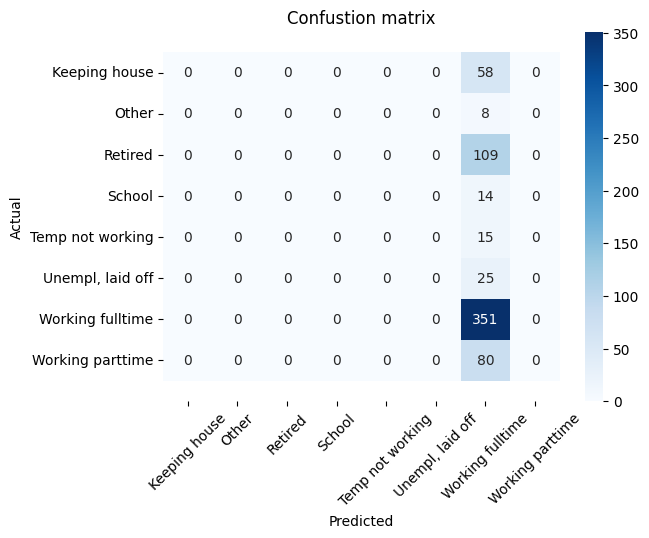

In [9]:
classes = model.classes_
plot_confusion_matrix(y_test, y_pred, classes=classes)

In [10]:
index_to_features_list = dict(zip(range(len(features_list)), features_list))

index_to_features_list

{0: 'emailtotal',
 1: 'harass5_0',
 2: 'harass5_1',
 3: 'harass5_2',
 4: 'harass5_3',
 5: 'snapchat_0',
 6: 'snapchat_1',
 7: 'snapchat_2',
 8: 'instagrm_0',
 9: 'instagrm_1',
 10: 'instagrm_2',
 11: 'polviews_0',
 12: 'polviews_1',
 13: 'polviews_2',
 14: 'polviews_3',
 15: 'polviews_4',
 16: 'polviews_5',
 17: 'polviews_6',
 18: 'polviews_7',
 19: 'advfront_0',
 20: 'advfront_1',
 21: 'advfront_2',
 22: 'advfront_3',
 23: 'advfront_4',
 24: 'advfront_5',
 25: 'educ_2',
 26: 'educ_4',
 27: 'educ_5',
 28: 'educ_6',
 29: 'educ_7',
 30: 'educ_8',
 31: 'educ_9',
 32: 'educ_10',
 33: 'educ_11',
 34: 'educ_12',
 35: 'educ_13',
 36: 'educ_14',
 37: 'educ_15',
 38: 'educ_16',
 39: 'educ_17',
 40: 'educ_18',
 41: 'educ_19',
 42: 'educ_20'}

In [11]:
index_to_features_list_update = {}
for k, v in index_to_features_list.items():
    if v == "emailtotal":
        index_to_features_list_update[k] = v
    else:
        field, index = v.split("_")
        val_to_ind = {v: k for k, v in value_to_index[field].items()}
        #print(val_to_ind)
        if int(index) in val_to_ind:
            text_value = val_to_ind[int(index)]
            if isinstance(text_value, str):
                space_split = text_value.split(" ")
                if len(space_split) == 1:
                    index_to_features_list_update[k] = "{}_{}".format(field, space_split[0])
                else:
                    index_to_features_list_update[k] = "{}_{}".format(field, "_".join(space_split))
            else:
                index_to_features_list_update[k] = "{}_{}".format(field, int(text_value))
        else:
            index_to_features_list_update[k] = "{}_{}".format(field, "Unknown")
index_to_features_list = index_to_features_list_update
index_to_features_list

{0: 'emailtotal',
 1: 'harass5_Unknown',
 2: 'harass5_Does_not_apply_(i_do_not_have_a_job/superior/co-worker)',
 3: 'harass5_No',
 4: 'harass5_Yes',
 5: 'snapchat_Unknown',
 6: 'snapchat_No',
 7: 'snapchat_Yes',
 8: 'instagrm_Unknown',
 9: 'instagrm_No',
 10: 'instagrm_Yes',
 11: 'polviews_Unknown',
 12: 'polviews_Extrmly_conservative',
 13: 'polviews_Conservative',
 14: 'polviews_Slghtly_conservative',
 15: 'polviews_Moderate',
 16: 'polviews_Slightly_liberal',
 17: 'polviews_Liberal',
 18: 'polviews_Extremely_liberal',
 19: 'advfront_Unknown',
 20: 'advfront_Strongly_disagree',
 21: 'advfront_Disagree',
 22: 'advfront_Dont_know',
 23: 'advfront_Agree',
 24: 'advfront_Strongly_agree',
 25: 'educ_2',
 26: 'educ_4',
 27: 'educ_5',
 28: 'educ_6',
 29: 'educ_7',
 30: 'educ_8',
 31: 'educ_9',
 32: 'educ_10',
 33: 'educ_11',
 34: 'educ_12',
 35: 'educ_13',
 36: 'educ_14',
 37: 'educ_15',
 38: 'educ_16',
 39: 'educ_17',
 40: 'educ_18',
 41: 'educ_19',
 42: 'educ_20'}

In [12]:
pseudo_label = np.unique(y)
index_to_pseudo_label = dict(zip(range(len(pseudo_label)), pseudo_label))
index_to_pseudo_label

{0: 'Keeping house',
 1: 'Other',
 2: 'Retired',
 3: 'School',
 4: 'Temp not working',
 5: 'Unempl, laid off',
 6: 'Working fulltime',
 7: 'Working parttime'}

In [13]:
original_weights = model.coef_.dot(U.T)

In [14]:
importance = {}
for i in range(original_weights.shape[0]):
    importance[index_to_pseudo_label[i]] = dict(zip(np.vectorize(lambda x: index_to_features_list[x])(np.argsort(np.abs(original_weights[i]))[::-1]), np.round(original_weights[i][np.argsort(np.abs(original_weights[i]))[::-1]], 3)))
    
importance

{'Keeping house': {'emailtotal': -0.167,
  'advfront_Agree': 0.135,
  'snapchat_No': 0.105,
  'instagrm_Unknown': -0.102,
  'snapchat_Unknown': -0.102,
  'instagrm_No': 0.09,
  'harass5_Unknown': 0.082,
  'advfront_Unknown': -0.081,
  'harass5_No': -0.07,
  'polviews_Moderate': 0.06,
  'advfront_Strongly_agree': -0.052,
  'educ_12': 0.034,
  'educ_16': -0.027,
  'polviews_Liberal': -0.016,
  'polviews_Slghtly_conservative': -0.016,
  'polviews_Slightly_liberal': -0.013,
  'instagrm_Yes': 0.012,
  'polviews_Extremely_liberal': -0.011,
  'harass5_Yes': -0.008,
  'educ_13': -0.006,
  'educ_20': -0.004,
  'educ_18': -0.004,
  'harass5_Does_not_apply_(i_do_not_have_a_job/superior/co-worker)': -0.004,
  'educ_15': 0.003,
  'educ_10': 0.003,
  'polviews_Conservative': -0.003,
  'snapchat_Yes': -0.003,
  'educ_11': 0.002,
  'advfront_Disagree': -0.002,
  'educ_8': 0.002,
  'educ_19': -0.001,
  'educ_17': -0.001,
  'educ_14': -0.001,
  'advfront_Dont_know': 0.001,
  'advfront_Strongly_disagree'

f:\Programming\PythonProjects\Master\Social_Sciences_Analysis\Final_Term\utils.py:233: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
f:\Programming\PythonProjects\Master\Social_Sciences_Analysis\Final_Term\utils.py:233: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
f:\Programming\PythonProjects\Master\Social_Sciences_Analysis\Final_Term\utils.py:233: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
No artists with labels found to 

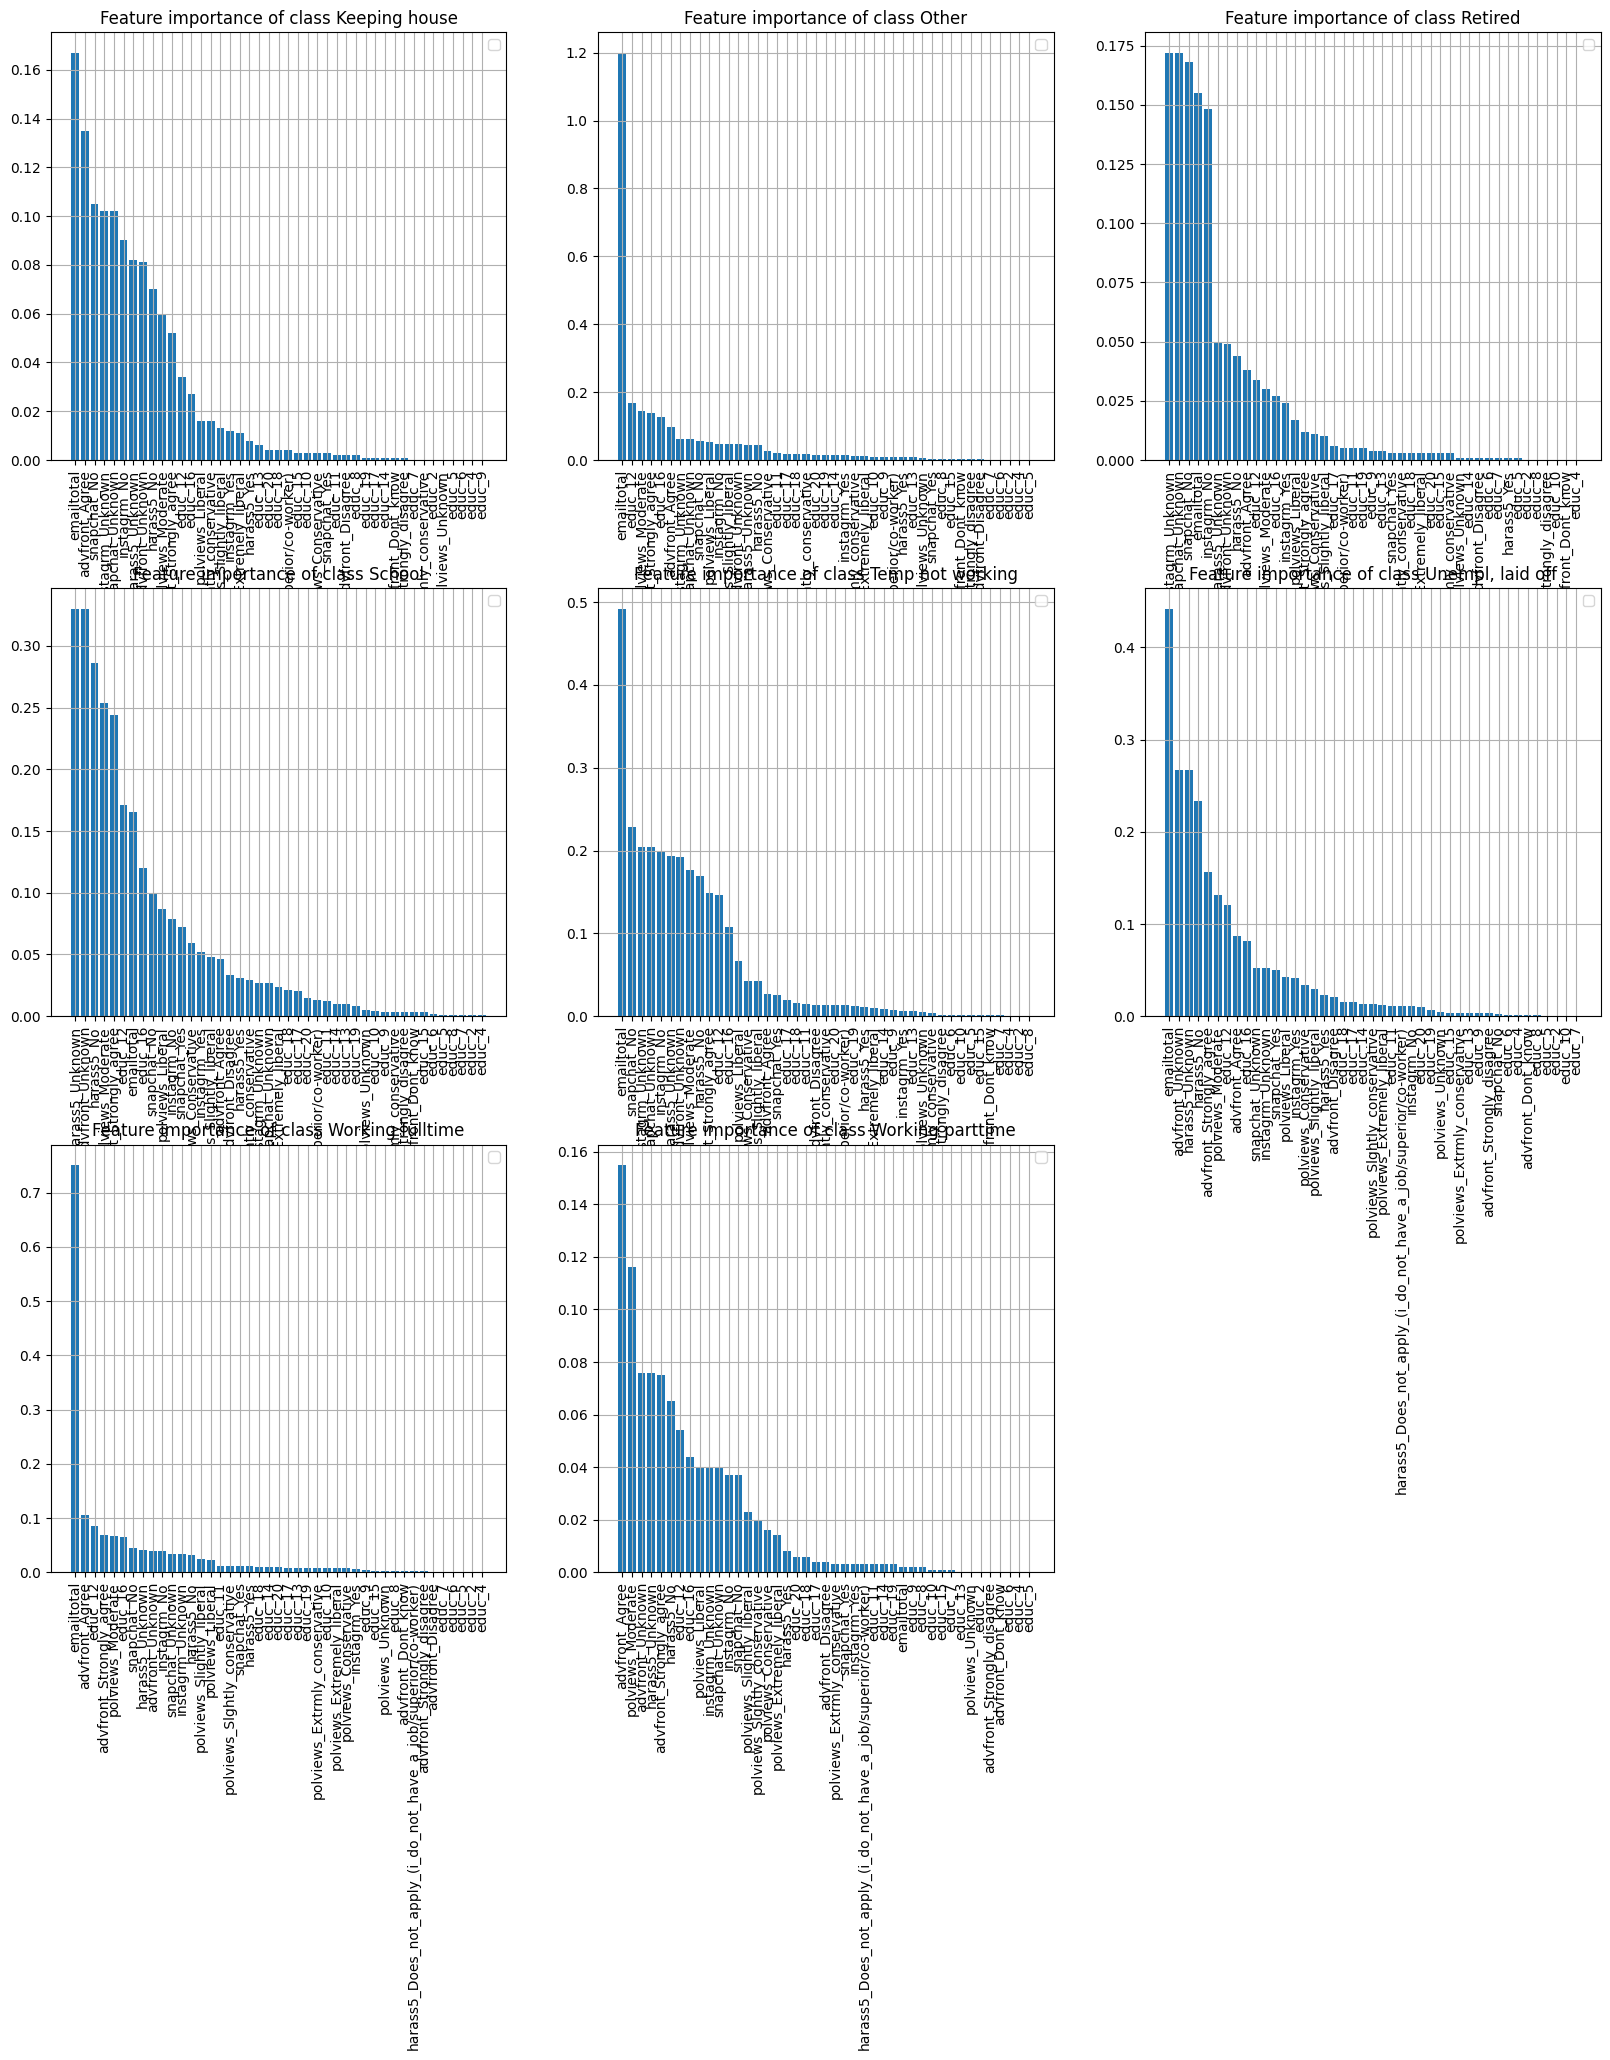

In [15]:
plot_bar_importance(importance)

## Sử dụng feature gốc

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [17]:
model = LogisticRegression(multi_class='multinomial', solver='saga')
model.fit(X_train, y_train)

c:\Users\Thanh_Tuyet\.conda\envs\pytorch_tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='saga')

In [18]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                  precision    recall  f1-score   support

   Keeping house       0.21      0.09      0.12        58
           Other       0.00      0.00      0.00         8
         Retired       0.36      0.14      0.20       109
          School       0.00      0.00      0.00        14
Temp not working       0.00      0.00      0.00        15
Unempl, laid off       0.00      0.00      0.00        25
Working fulltime       0.56      0.90      0.69       351
Working parttime       0.19      0.06      0.09        80

        accuracy                           0.52       660
       macro avg       0.16      0.15      0.14       660
    weighted avg       0.40      0.52      0.42       660



c:\Users\Thanh_Tuyet\.conda\envs\pytorch_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Thanh_Tuyet\.conda\envs\pytorch_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Thanh_Tuyet\.conda\envs\pytorch_tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

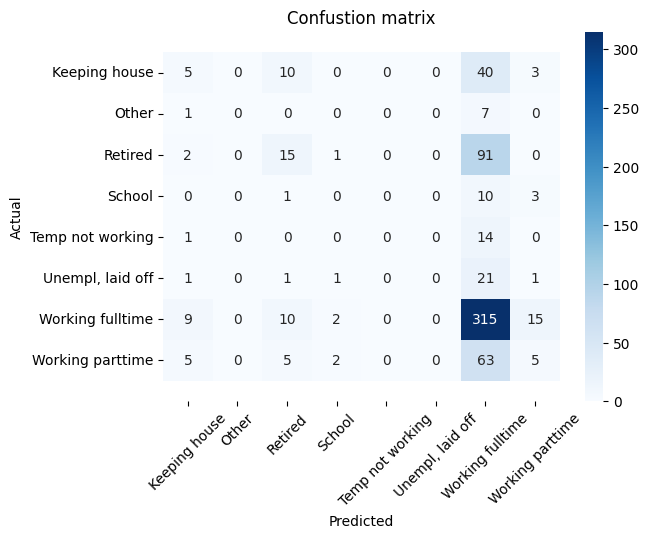

In [19]:
classes = model.classes_
plot_confusion_matrix(y_test, y_pred, classes=classes)

In [20]:
original_weights = model.coef_

In [21]:
importance = {}
for i in range(original_weights.shape[0]):
    importance[index_to_pseudo_label[i]] = dict(zip(np.vectorize(lambda x: index_to_features_list[x])(np.argsort(np.abs(original_weights[i]))[::-1]), np.round(original_weights[i][np.argsort(np.abs(original_weights[i]))[::-1]], 3)))
    
importance

{'Keeping house': {'advfront_Dont_know': 0.974,
  'polviews_Extrmly_conservative': 0.877,
  'educ_4': 0.827,
  'educ_19': -0.675,
  'educ_10': 0.608,
  'polviews_Unknown': 0.572,
  'advfront_Strongly_agree': -0.572,
  'educ_15': -0.56,
  'polviews_Conservative': -0.556,
  'harass5_Does_not_apply_(i_do_not_have_a_job/superior/co-worker)': 0.503,
  'educ_6': 0.466,
  'polviews_Slghtly_conservative': -0.464,
  'harass5_Yes': -0.434,
  'educ_17': -0.427,
  'educ_8': 0.363,
  'snapchat_No': 0.356,
  'advfront_Agree': -0.331,
  'educ_7': -0.331,
  'educ_11': 0.294,
  'educ_18': -0.276,
  'polviews_Liberal': -0.239,
  'advfront_Disagree': 0.233,
  'snapchat_Yes': -0.213,
  'advfront_Unknown': -0.202,
  'harass5_Unknown': 0.179,
  'educ_2': -0.16,
  'educ_13': -0.157,
  'instagrm_No': 0.155,
  'harass5_No': -0.136,
  'polviews_Extremely_liberal': -0.118,
  'educ_20': 0.107,
  'educ_9': -0.059,
  'educ_16': 0.058,
  'polviews_Slightly_liberal': 0.041,
  'instagrm_Unknown': -0.032,
  'snapchat_U

f:\Programming\PythonProjects\Master\Social_Sciences_Analysis\Final_Term\utils.py:233: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
f:\Programming\PythonProjects\Master\Social_Sciences_Analysis\Final_Term\utils.py:233: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
f:\Programming\PythonProjects\Master\Social_Sciences_Analysis\Final_Term\utils.py:233: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
No artists with labels found to 

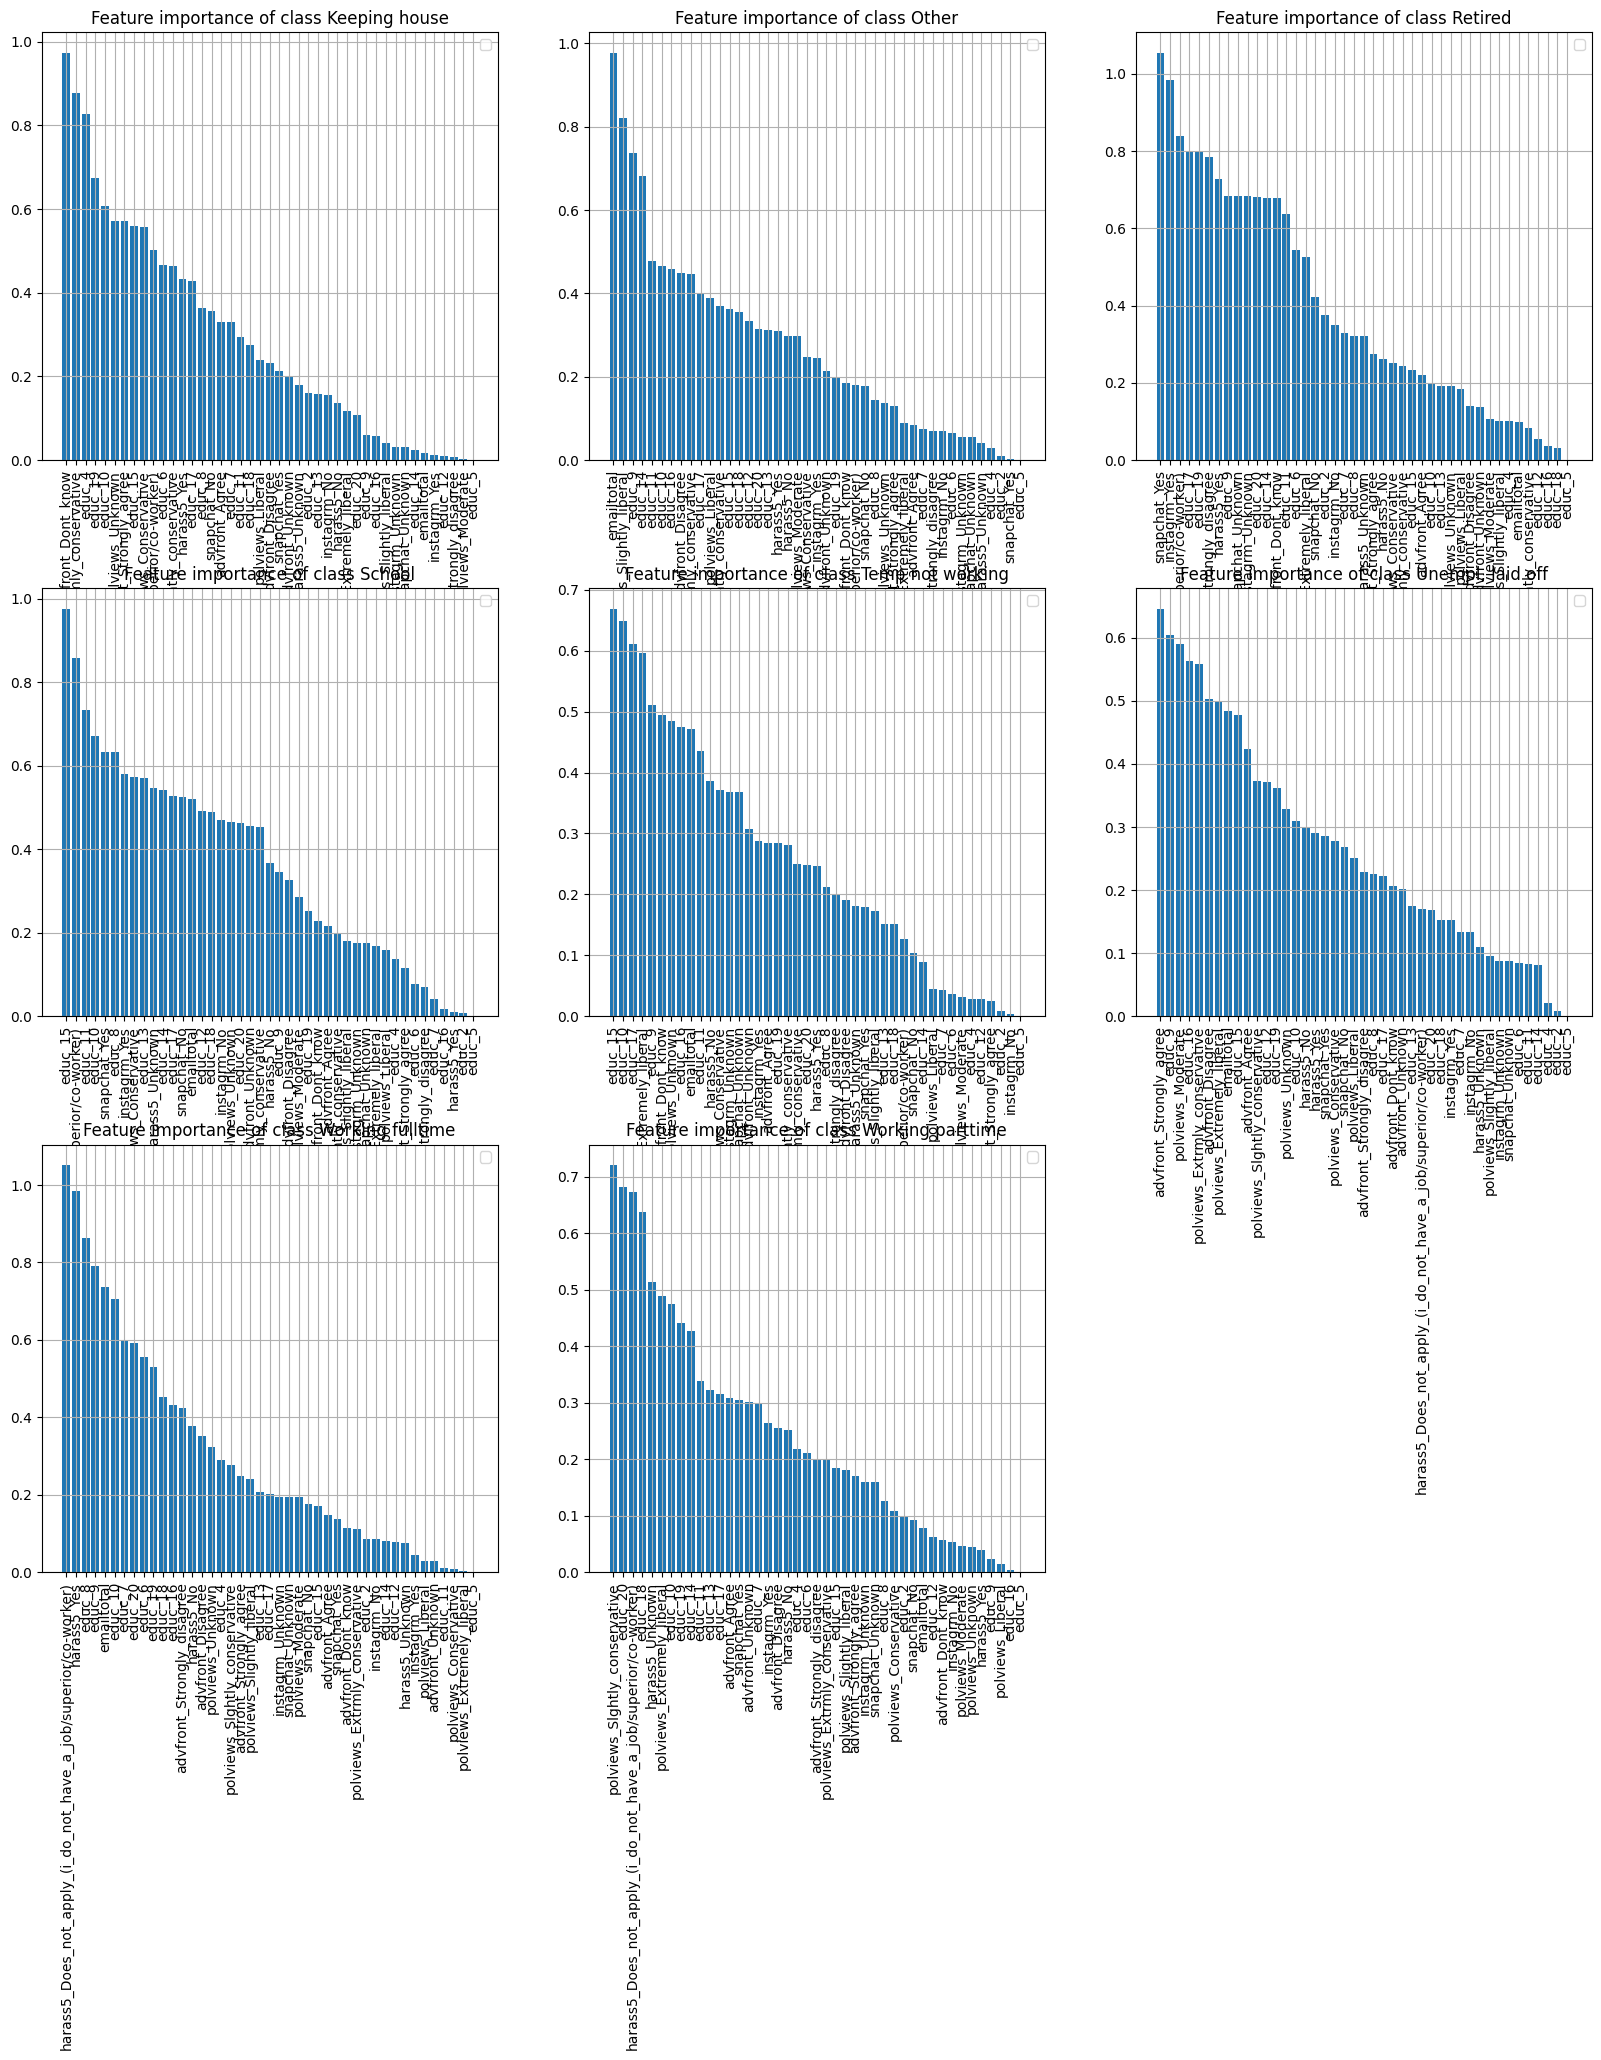

In [22]:
plot_bar_importance(importance)

# Phân loại tập dữ liệu với email là null

## Sử dụng feature thu được từ PCA

In [23]:
columns_to_check = ['educ', 'wrkstat']
df.dropna(subset=columns_to_check, inplace=True)

In [24]:
df['emailtotal'] = np.where(df['emailhr'].isna() | df['emailmin'].isna(), np.nan, df['emailhr'] * 60 + df['emailmin'])
df = df.drop(['emailhr', 'emailmin'], axis=1)

In [25]:
df = df[df['emailtotal'].isna()]

In [26]:
df = df.drop(['emailtotal'], axis=1)

In [27]:
df.shape

(1210, 7)

In [28]:
column_unique_value = {}
for col in df.columns.tolist():
    if col == 'emailtotal':
        continue
    try:
        print(col, np.unique(df[col].to_numpy()))
        column_unique_value[col] = np.unique(df[col].to_numpy())
    except:
        print(col, list(set(df[col].tolist())))
        column_unique_value[col] = list(set(df[col].tolist()))

harass5 [nan, 'Does not apply (i do not have a job/superior/co-worker)', 'No', 'Yes']
educ [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
polviews [nan, 'Moderate', 'Slghtly conservative', 'Liberal', 'Extrmly conservative', 'Slightly liberal', 'Extremely liberal', 'Conservative']
advfront [nan, 'Dont know', 'Disagree', 'Agree', 'Strongly disagree', 'Strongly agree']
snapchat ['Yes', nan, 'No']
instagrm ['Yes', nan, 'No']
wrkstat ['Keeping house' 'Other' 'Retired' 'School' 'Temp not working'
 'Unempl, laid off' 'Working fulltime' 'Working parttime']


In [29]:
value_to_index = {}

for col in df.columns.tolist():
    if col == 'emailtotal':
        continue
    try:
        unique_set = np.unique(df[col].to_numpy()).tolist()
        unique_set = [x for x in unique_set if not math.isnan(x)]
        print(col, unique_set)
        unique_set.sort()
        value_to_index[col] = dict(zip(unique_set, unique_set))
    except:
        #print(col, list(set(df[col].tolist())))
        unique_set = list(set(df[col].tolist()))
        chosens = []
        for i in unique_set:
            if isinstance(i, float):
                if math.isnan(i):
                    continue
            #print(type(i), i)
            chosens.append(i)
        unique_set = chosens
        
        print(col, unique_set)
        unique_set.sort()
    
        if col == "advfront":
            value_to_index[col] = {'Strongly disagree': 1, 'Disagree': 2, 'Dont know': 3, 'Agree': 4, 'Strongly agree': 5}
        elif col == "polviews":
            value_to_index[col] = {'Extrmly conservative': 1, 'Conservative': 2, 'Slghtly conservative': 3, 'Moderate': 4, 'Slightly liberal': 5, 'Liberal': 6, 'Extremely liberal': 7}
        elif col == "educ" or col == "wrkstat":
            value_to_index[col] = dict(zip(unique_set, range(len(unique_set))))
        else:
            value_to_index[col] = dict(zip(unique_set, range(1, len(unique_set) + 1)))
        
print(value_to_index)

harass5 ['Does not apply (i do not have a job/superior/co-worker)', 'No', 'Yes']
educ [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
polviews ['Moderate', 'Slghtly conservative', 'Liberal', 'Extrmly conservative', 'Slightly liberal', 'Extremely liberal', 'Conservative']
advfront ['Dont know', 'Disagree', 'Agree', 'Strongly disagree', 'Strongly agree']
snapchat ['Yes', 'No']
instagrm ['Yes', 'No']
wrkstat ['Other', 'Temp not working', 'Working parttime', 'School', 'Unempl, laid off', 'Working fulltime', 'Retired', 'Keeping house']
{'harass5': {'Does not apply (i do not have a job/superior/co-worker)': 1, 'No': 2, 'Yes': 3}, 'educ': {0.0: 0.0, 1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0, 9.0: 9.0, 10.0: 10.0, 11.0: 11.0, 12.0: 12.0, 13.0: 13.0, 14.0: 14.0, 15.0: 15.0, 16.0: 16.0, 17.0: 17.0, 18.0: 18.0, 19.0: 19.0, 20.0: 20.0}, 'polviews': {'Extrmly conservative': 1, 'Conservative': 2

In [30]:
for col in df.columns.tolist():
    if col == 'emailtotal' or col == "wrkstat":
        continue
    df[col] = df[col].map(value_to_index[col])

In [31]:
df

,harass5,educ,polviews,advfront,snapchat,instagrm,wrkstat
2,2.0,16.0,2.0,NaN,1.0,1.0,Retired
4,2.0,18.0,5.0,NaN,2.0,2.0,Working parttime
7,2.0,11.0,3.0,NaN,2.0,2.0,Working parttime
9,2.0,14.0,2.0,NaN,1.0,1.0,Retired
11,NaN,12.0,3.0,3.0,NaN,NaN,Retired
...,...,...,...,...,...,...,...
2851,2.0,12.0,4.0,NaN,1.0,1.0,Working fulltime
2854,2.0,11.0,4.0,NaN,NaN,NaN,Retired
2859,2.0,12.0,3.0,NaN,NaN,NaN,Working parttime
2861,2.0,12.0,2.0,NaN,NaN,NaN,Retired


In [32]:
categorical_columns = ['harass5', 'polviews', 'advfront', 'snapchat', 'instagrm', 'wrkstat']

df[categorical_columns] = df[categorical_columns].fillna(0)

df['educ'] = df['educ'].fillna(21)

#df['emailtotal'] = df['emailtotal'].fillna(0)

In [33]:
df

,harass5,educ,polviews,advfront,snapchat,instagrm,wrkstat
2,2.0,16.0,2.0,0.0,1.0,1.0,Retired
4,2.0,18.0,5.0,0.0,2.0,2.0,Working parttime
7,2.0,11.0,3.0,0.0,2.0,2.0,Working parttime
9,2.0,14.0,2.0,0.0,1.0,1.0,Retired
11,0.0,12.0,3.0,3.0,0.0,0.0,Retired
...,...,...,...,...,...,...,...
2851,2.0,12.0,4.0,0.0,1.0,1.0,Working fulltime
2854,2.0,11.0,4.0,0.0,0.0,0.0,Retired
2859,2.0,12.0,3.0,0.0,0.0,0.0,Working parttime
2861,2.0,12.0,2.0,0.0,0.0,0.0,Retired


In [34]:
#df["wrkstat"] = df["wrkstat"].astype(np.int16)
#casted_columns = ['harass5', 'educ', 'polviews', 'advfront', 'snapchat', 'instagrm', 'emailtotal']
casted_columns = ['harass5', 'educ', 'polviews', 'advfront', 'snapchat', 'instagrm']
#casted_columns = ['emailtotal']

for col in casted_columns:
    df[col] = df[col].astype(np.int16)

In [35]:
df

,harass5,educ,polviews,advfront,snapchat,instagrm,wrkstat
2,2,16,2,0,1,1,Retired
4,2,18,5,0,2,2,Working parttime
7,2,11,3,0,2,2,Working parttime
9,2,14,2,0,1,1,Retired
11,0,12,3,3,0,0,Retired
...,...,...,...,...,...,...,...
2851,2,12,4,0,1,1,Working fulltime
2854,2,11,4,0,0,0,Retired
2859,2,12,3,0,0,0,Working parttime
2861,2,12,2,0,0,0,Retired


In [36]:
categorical_columns = ['harass5', 'snapchat', 'instagrm', 'polviews', 'advfront', 'educ']
#numerical_columns = ['emailtotal']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
#scaler = MinMaxScaler()
#scaler = StandardScaler()

#df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
#df_encoded = scaler.fit_transform(df_encoded)

df_encoded

,wrkstat,harass5_0,harass5_1,harass5_2,harass5_3,snapchat_0,snapchat_1,snapchat_2,instagrm_0,instagrm_1,...,educ_11,educ_12,educ_13,educ_14,educ_15,educ_16,educ_17,educ_18,educ_19,educ_20
2,Retired,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,Working parttime,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,Working parttime,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9,Retired,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
11,Retired,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,Working fulltime,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2854,Retired,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2859,Working parttime,0,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2861,Retired,0,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
y = df_encoded["wrkstat"]
y = y.to_numpy()

x = df_encoded.drop("wrkstat", axis=1).to_numpy()
U, reduced_x = pca(x=x, alpha=0.4)

# pca = PCA(n_components=3)
# pca.fit(x)
# reduced_x = pca.transform(x)

x.shape, y, reduced_x

((1210, 45),
 array(['Retired', 'Working parttime', 'Working parttime', ...,
        'Working parttime', 'Retired', 'Retired'], dtype=object),
 array([[ 1.30435   ,  0.46552921,  0.28922308],
        [ 0.60632419,  1.35262702, -0.48602664],
        [ 0.5626903 ,  1.33346182, -0.48373106],
        ...,
        [-0.64536006,  1.17042439,  0.69260063],
        [-0.68966536,  1.249954  ,  0.62442762],
        [ 1.3486553 ,  0.38599959,  0.35739608]]))

In [38]:
original_df = data["gss16"]

func_x, func_y, features_list, value_to_index= preprocess_data(df=original_df, remove_email_null=False, use_text_categorical=False, one_hot_encode=True)

U, reduced_func_x = pca(x=func_x, alpha=0.4)

reduced_func_x

array([[ 1.30435   ,  0.46552921,  0.28922308],
       [ 0.60632419,  1.35262702, -0.48602664],
       [ 0.5626903 ,  1.33346182, -0.48373106],
       ...,
       [-0.64536006,  1.17042439,  0.69260063],
       [-0.68966536,  1.249954  ,  0.62442762],
       [ 1.3486553 ,  0.38599959,  0.35739608]])

In [39]:
np.sum((reduced_x - reduced_func_x)**2)

0.0